In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'finviz_3_22_2020.csv')

In [3]:
df.columns

Index(['No.', 'Ticker', 'Company', 'Sector', 'Industry', 'Country',
       'Market Cap', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'P/Cash',
       'P/Free Cash Flow', 'Dividend Yield', 'Payout Ratio', 'EPS (ttm)',
       'EPS growth this year', 'EPS growth next year',
       'EPS growth past 5 years', 'EPS growth next 5 years',
       'Sales growth past 5 years', 'EPS growth quarter over quarter',
       'Sales growth quarter over quarter', 'Shares Outstanding',
       'Shares Float', 'Insider Ownership', 'Insider Transactions',
       'Institutional Ownership', 'Institutional Transactions', 'Float Short',
       'Short Ratio', 'Return on Assets', 'Return on Equity',
       'Return on Investment', 'Current Ratio', 'Quick Ratio',
       'LT Debt/Equity', 'Total Debt/Equity', 'Gross Margin',
       'Operating Margin', 'Profit Margin', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',

In [4]:
df.shape

(7744, 71)

# Step 1: State the Null & Alternative Hypotheses

### High debted company year to date returns equal low debted company year to date returns

$$H_0: \mu_1-\mu_2=0$$

### High debted company year to date returns do not equal low debted company year to date returns

$$H_a: \mu_1-\mu_2\neq0$$

# Step 2: Identify the Test Statistic & Probability Distribution

$$t = \frac{(\bar{x_1} - \bar{x_2})- (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^\frac{1}{2}}$$

$$s_p^2 = \frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$$

In [5]:
df[(df['Total Debt/Equity'] >= 1) & (df['Sector'] != 'Financial') & (df['Price'] >= 5)].shape

(584, 71)

In [6]:
df[(df['Total Debt/Equity'] < 1) & (df['Sector'] != 'Financial') & (df['Price'] >= 5)].shape

(1584, 71)

In [7]:
n_1 = 584
n_2 = 1584
dof = n_1 + n_2 -2
dof

2166

# Step 3: Specify the Decision Rule

In [8]:
from scipy import stats 
stats.t.isf(0.025, dof)

1.9610598178123775

# Step 4: Now Collect Data & Calculate Test Statistic

In [9]:
df['YTD'] = df['Performance (YTD)'].apply(lambda x: float(str(x).strip('%'))/100)

In [10]:
df['YTD']

0      -0.3630
1      -0.5317
2      -0.3375
3      -0.2596
4      -0.4071
         ...  
7739   -0.4947
7740   -0.1756
7741   -0.3636
7742   -0.4540
7743   -0.6379
Name: YTD, Length: 7744, dtype: float64

In [11]:
high_debt_df = df[(df['Total Debt/Equity'] >= 1) & (df['Sector'] != 'Financial') & (df['Price'] >= 5)]

In [12]:
low_debt_df = df[(df['Total Debt/Equity'] < 1) & (df['Sector'] != 'Financial') & (df['Price'] >= 5)]

In [13]:
high_debt_df['YTD']

5      -0.2368
6      -0.3372
13     -0.2394
14      0.4395
17     -0.2456
         ...  
7720   -0.3107
7726   -0.1743
7727   -0.1542
7730   -0.4580
7731   -0.3889
Name: YTD, Length: 584, dtype: float64

In [14]:
low_debt_df['YTD']

0      -0.3630
2      -0.3375
3      -0.2596
4      -0.4071
7      -0.1928
         ...  
7716   -0.1157
7717   -0.1706
7719   -0.5510
7721   -0.4959
7728   -0.5002
Name: YTD, Length: 1584, dtype: float64

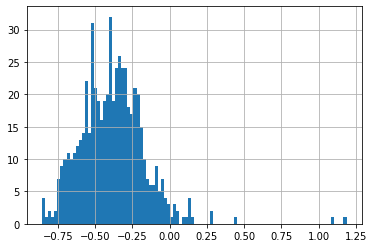

In [15]:
high_debt_df['YTD'].hist(bins=100)

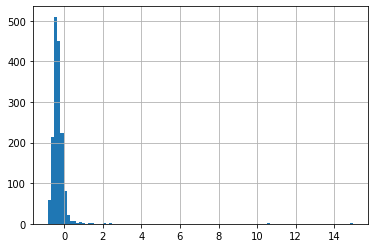

In [16]:
low_debt_df['YTD'].hist(bins=100)

In [17]:
x_1 = high_debt_df['YTD'].mean()
x_1

-0.3845806506849315

In [18]:
x_2 = low_debt_df['YTD'].mean()
x_2

-0.30446755050505053

In [19]:
s_1 = high_debt_df['YTD'].var()
s_1

0.04726763226647126

In [20]:
s_2 = low_debt_df['YTD'].var()
s_2

0.2826447459962704

In [22]:
stats.ttest_ind(high_debt_df['YTD'], low_debt_df['YTD'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-4.974385351535249, pvalue=7.065404495761367e-07)